# 10장 정리

# 회귀분석으로 예측변수 예측

In [1]:
from IPython.display import Image

## 선형회귀

단순선형회귀는 하나의 특성(설명변수)과 연속적인 타깃 (응답변수)사이의 관계를 모델링을 의미합니다. 특징 하나인 선형 모델 공식은 다음과 같습니다.
y=w0+w1*x 데이터와 가장 잘 맞는 직선을 회귀직선 . 직선과 샘플사이의 직선거리를 오프셋 예측오차인 잔차라고 합니다

In [2]:
Image(url='https://git.io/Jts3N', width=500) 

## 다중 선형회귀

다중 선형회귀는 하나 이상의 특성(설명변수)와 연속적인 타깃(응답변수)사이의 관계를 모델링을 의미합니다.

In [3]:
Image(url='https://git.io/Jts3p', width=500) 

# 주택 데이터셋 탐색

## 데이터 프레임으로 주택 데이터셋 읽기

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 시각화

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

상관관계 분석 피어슨 상관계수 확인 r=1이면 양의 상관관계 -1이면 음의 상관관계를 가지고 0이면 독립으로 판단합니다

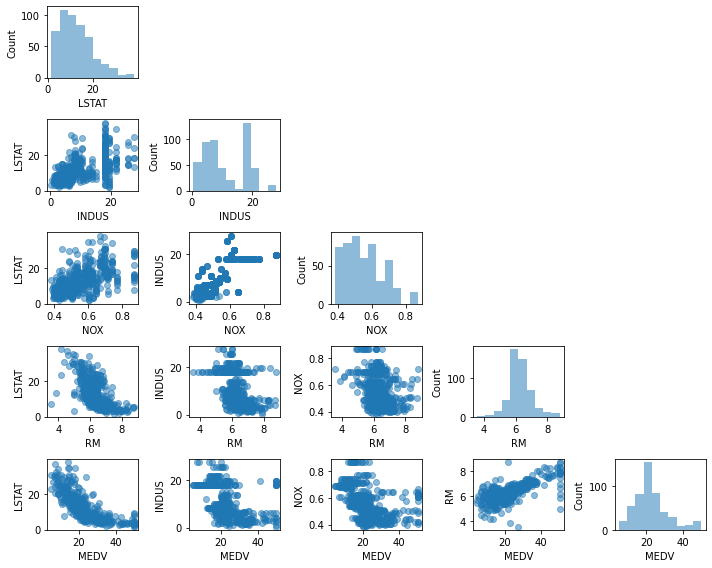

In [6]:
cols=['LSTAT','INDUS','NOX','RM','MEDV']
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

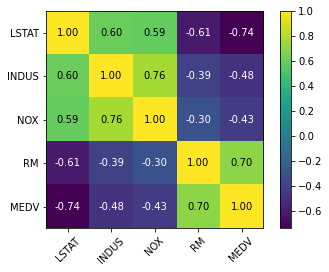

In [7]:
import numpy as np
from mlxtend.plotting import heatmap#히트맵 호출
cm=np.corrcoef(df[cols].values.T)#상관계수 출력 각 컬럼별
hm=heatmap(cm,row_names=cols,column_names=cols)#히트맵 출력
plt.show()

# 최소제곱 선형 회귀 모델 구현

선형 회귀는 훈련데이터와 가장 잘 맞는 직선 찾는것 방식은 최소제곱법 /선형최소제곱법
선형 활성화 함수를 사용한 인공뉴련인 아달린 구현 비용함수 정의 경사하강법,확률적 경사하강법 최적화 알고리즘 사용
아달린의 비용 함수 제곱오차합 사용한다

## 회귀 모델 구현

In [8]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    
                

표준화 전처리

In [9]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)#표준화
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()#표준화 
lr=LinearRegressionGD()#선형학습
lr.fit(X_std,y_std)


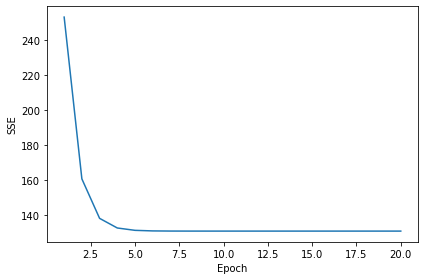

In [10]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
#5번째에서 수렴하였습니다.

In [11]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white',s=70)
    plt.plot(X,model.predict(X),color='black',lw=2)
    return None

Text(0, 0.5, 'price in 1000$')

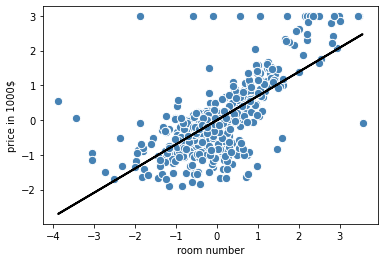

In [12]:
lin_regplot(X_std,y_std,lr)
plt.xlabel("room number")
plt.ylabel("price in 1000$")

In [13]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


In [14]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)

## 사이킷런으로 회귀모델의 가중치 추정

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
slr=LinearRegression()
slr.fit(X,y)
y_pred=slr.predict(X)
print('기울기:%.3f'%slr.coef_[0])
print('절편:%.3f'%slr.intercept_)

기울기:9.102
절편:-34.671


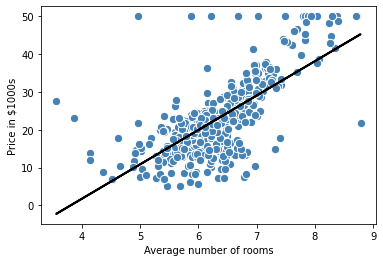

In [17]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms')
plt.ylabel('Price in $1000s')

# plt.savefig('images/10_07.png', dpi=300)
plt.show()

# RANSAC을 사용하여 안정된 회귀 모델 훈련

선형회귀모델을 이상치에 크게 영향을 받습니다.이상치가 많으면 예측하는데에 많은 어려움을 느낄 수 있습니다. 이상치를 쉽사리 제거할수 없습니다. 그대신 ransac 알고리즘을 사용합니다
<br>1.랜덤하게 일부 샘플을 정상치로 선택하여 모델 훈련합니다
<br>2.훈련된 모델에서 다른모든 포인트를 테스트합니다. 사용자가 입력한 허용 오차 안에 속한 포인트를 정상치에 추가합니다
<br>3. 모든 정상치를 사용하여 모델을 다시훈련합니다
<br>4. 훈련된 모델과 정상치 간의 오차를 추정합니다
<br>5. 성능이 사용자가 지정한 임계값에 도달하거나 지정된 반복횟수에 도달하면 알고리즘을 종료합니다.

In [18]:
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor(LinearRegression(),
                      max_trials=100,
                      min_samples=50,
                      loss='absolute_loss',
                      residual_threshold=5.0,
                      random_state=0)
ransac.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), loss='absolute_loss',
                min_samples=50, random_state=0, residual_threshold=5.0)

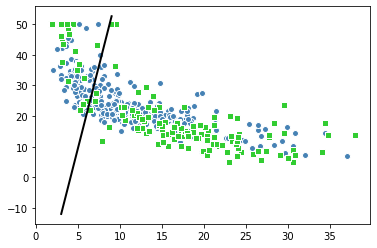

In [23]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)

line_X=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_X[:,np.newaxis])
plt.scatter(X[inlier_mask],y[inlier_mask],c='steelblue',edgecolor='white',marker='o',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],c='limegreen',edgecolor='white',marker='s',label='Outliers')
plt.plot(line_X,line_y_ransac,color='black',lw=2)


# 선형회귀모델의 성능평가

다중선형회귀로 모델평가한다

In [24]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df['MEDV'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
slr=LinearRegression()
slr.fit(X_train,y_train)
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)

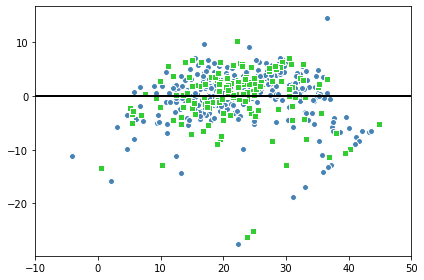

In [25]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',edgecolor='white',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='limegreen',marker='s',edgecolor='white',label='Test data')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.tight_layout()

In [26]:
from sklearn.metrics import mean_squared_error
print('훈련 mse:%.3f 테스트 mse:%.3f'%(mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
#과대적합이 발생하였다고 볼수있다

훈련 mse:19.958 테스트 mse:27.196


결정계수 확인

In [27]:
from sklearn.metrics import r2_score
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 R^2: 0.765, 테스트 R^2: 0.673


# 회귀에 규제 적용

규제는 학습의 과대적합을 방지하는 한 방법입니다.
릿지,라쏘 엘라스틱 넷을 사용하여 규제를 이뤄냅니다.

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

릿지

In [29]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)


리쏘 회귀

In [30]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

엘라스틱 넷 회귀

# 선형 회귀 모델을 다항 회귀로 변환

특성과 타깃 사이의 관계가 선형이라고 가정할시 선형가정이 어긋나면 다항회귀모델을 사용한다

In [31]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [32]:
from sklearn.preprocessing import PolynomialFeatures

lr=LinearRegression()
pr=LinearRegression()
quadratic=PolynomialFeatures(degree=2)
X_quad=quadratic.fit_transform(X)

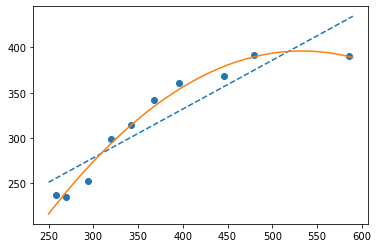

In [33]:
#선형 특성 학습
lr.fit(X,y)
X_fit=np.arange(250,600,10)[:,np.newaxis]
y_lin_fit=lr.predict(X_fit)
#이차항 특성 학습
pr.fit(X_quad,y)
y_quad_fit=pr.predict(quadratic.fit_transform(X_fit))
#결과 그래프
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')

다항회귀가 선형보다 잔차가 적다는것을 확인하여 다항회귀가 학습이 더 잘되어 있다는것을 확인할수 있습니다

In [34]:
#mse로 확인
y_lin_pred=lr.predict(X)
y_quad_pred=pr.predict(X_quad)
print(mean_squared_error(y,y_lin_pred),mean_squared_error(y,y_quad_pred))

569.7796663183207 61.33021451744755


## 주택 데이터 이용하여 비선형

In [41]:
X=df[['LSTAT']].values
y=df[['MEDV']].values
regr=LinearRegression()

In [42]:
quadratic=PolynomialFeatures(degree=2)
cubic=PolynomialFeatures(degree=3)
X_quad=quadratic.fit_transform(X)
X_cubic=cubic.fit_transform(X)

In [49]:
X_fit=np.arange(X.min(),X.max(),1)[:,np.newaxis]
regr=regr.fit(X,y)
y_lin_fit=regr.predict(X_fit)
linear_r2=r2_score(y,regr.predict(X))

regr=regr.fit(X_quad,y)
y_quad_fit=regr.predict(quadratic.transform(X_fit))
quadratic_r2=r2_score(y,regr.predict(X_quad))

regr=regr.fit(X_cubic,y)
y_cubic_fit=regr.predict(cubic.transform(X_fit))
cubic_r2=r2_score(y,regr.predict(X_cubic))

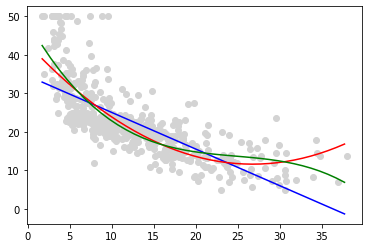

In [53]:
plt.scatter(X,y,label='training points',color='lightgray')
plt.plot(X_fit,y_lin_fit,label='Linear(d=1),$R^2=%.2f'%linear_r2,color='blue')
plt.plot(X_fit,y_quad_fit,label='Quadratic(d=2),$R^2=%.2f'%quadratic_r2,color='red')
plt.plot(X_fit,y_cubic_fit,label="Cubic(d=2),$R^2=%.2f"%cubic_r2,color='green')

다항모델들이 선형보다 잘 예측을 할수 있다고 볼 수잇다.

# 랜덤포레스트로 사용하요 비선형 관계 다루기

Text(0, 0.5, 'Price in $1000s [MEDV]')

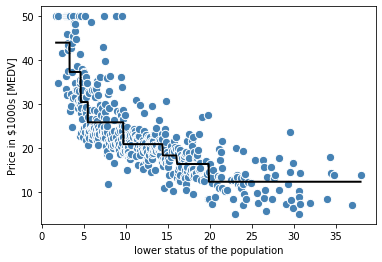

In [55]:
from sklearn.tree import DecisionTreeRegressor
X=df[['LSTAT']].values
y=df[['MEDV']].values
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx=X.flatten().argsort()
lin_regplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel("lower status of the population")
plt.ylabel("Price in $1000s [MEDV]")

In [56]:
X=df.iloc[:,:-1].values
y=df['MEDV'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)


In [59]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))
#과대적합으로 볼수 있다

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


1.6436227042243665
11.085384101576372


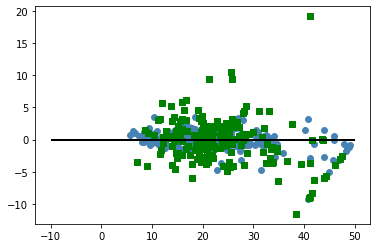

In [62]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='steelblue',marker='o',s=35)
plt.scatter(y_test_pred,y_test_pred-y_test,c='green',marker='s',s=35)
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')